In [1]:
import os
import numpy as np
import keras
from keras import layers
from tensorflow import data as tf_data
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import warnings
from scipy.ndimage import affine_transform


# Ignore all warnings
warnings.filterwarnings("ignore")
warnings.resetwarnings()

In [2]:
# Define paths to your data
train_dir = 'E:/Vaibhav/Study_CS/IIT PG/train/PetImages'
validation_dir = 'E:/Vaibhav/Study_CS/IIT PG/Test/PetImages'
test_dir = 'E:/Vaibhav/Study_CS/IIT PG/Validate/PetImages'

In [3]:
num_skipped = 0
for folder_name in ("Cat", "Dog"):
    folder_path = os.path.join("E:/Vaibhav/Study_CS/IIT PG/train/PetImages", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = b"JFIF" in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print(f"Deleted {num_skipped} images.")

Deleted 0 images.


In [4]:
# Define image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 128

In [5]:
# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

In [7]:
# Freeze convolutional layers
for layer in base_model.layers:
    layer.trainable = False

In [8]:
# Build custom classifier on top of VGG16
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [9]:
# Compile the model
optimizer = Adam(learning_rate=0.001)  # Specify learning_rate directly
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
# Train the model
history = model.fit(train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

C:\Users\VAIBHAV\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\legacy\preprocessing\image.py:1880: DeprecationWarning: Please import `affine_transform` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  scipy.ndimage.interpolation.affine_transform(


Epoch 1/10


C:\Users\VAIBHAV\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/23 ━━━━━━━━━━━━━━━━━━━━ 1098s 47s/step - accuracy: 0.5707 - loss: 1.8095 - val_accuracy: 0.8683 - val_loss: 0.2974
Epoch 2/10
 1/23 ━━━━━━━━━━━━━━━━━━━━ 12:48 35s/step - accuracy: 0.7812 - loss: 0.4764

C:\Users\VAIBHAV\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


23/23 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.7812 - loss: 0.4764 - val_accuracy: 0.8654 - val_loss: 0.3148
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1041s 45s/step - accuracy: 0.8305 - loss: 0.3804 - val_accuracy: 0.8973 - val_loss: 0.2497
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.8125 - loss: 0.3619 - val_accuracy: 0.8846 - val_loss: 0.2552
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1059s 46s/step - accuracy: 0.8548 - loss: 0.3247 - val_accuracy: 0.8984 - val_loss: 0.2273
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.8906 - loss: 0.2617 - val_accuracy: 0.9135 - val_loss: 0.2316
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1063s 46s/step - accuracy: 0.8688 - loss: 0.2997 - val_accuracy: 0.9107 - val_loss: 0.2056
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.8984 - loss: 0.2549 - val_accuracy: 0.9231 - val_loss: 0.2194
Epoch 9/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 598s 26s/step - accuracy: 0.8777 - loss: 0.2889 - val_accuracy: 0.9062 - val_loss:

In [11]:
# Evaluate the model on the test set
test_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 613 images belonging to 2 classes.


In [12]:
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

5/5 ━━━━━━━━━━━━━━━━━━━━ 90s 18s/step - accuracy: 0.9256 - loss: 0.2224
Test accuracy: 0.9119086265563965


In [17]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Function to preprocess the input image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array / 255.0  # Normalize pixel values

Enter the path to the input image:  E:/Vaibhav/VISHWAKARMA UNIVERSTY/8757.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


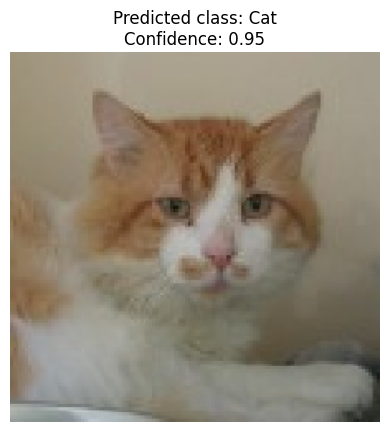

In [36]:
import matplotlib.pyplot as plt
# Take input image path from the user
input_image_path = input("Enter the path to the input image: ")

# Preprocess the input image
input_image = preprocess_image(input_image_path)

# Predict the class label and confidence
prediction = model.predict(input_image)

# Decode the prediction
class_label = "Dog" if prediction > 0.5 else "Cat"
confidence = prediction[0][0] if class_label == "Dog" else 1 - prediction[0][0]

# Load and display the input image
img = image.load_img(input_image_path, target_size=(img_width, img_height))
plt.imshow(img)
plt.axis('off')

# Display the predicted class label and confidence
plt.title(f"Predicted class: {class_label}\nConfidence: {confidence:.2f}")
plt.show()

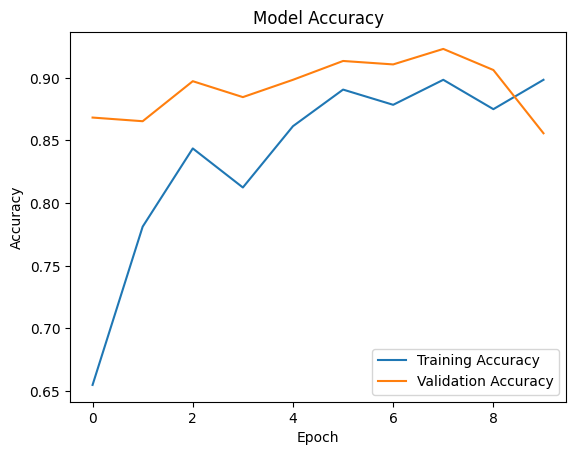

In [20]:
# Plot accuracy and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()


In [44]:
# Save the model
model.save('cats_dogs_classifier.keras')